# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('/content/Class B.csv')
print(df.head())

   NO NAMA   UTS  UAS  Pre-Test  Extraversion  Agreeableness  \
0   1  AHM  95.0   86      85.0          24.0           28.0   
1   2  ABA  90.0   85      80.0          24.0           27.0   
2   3  AAR  85.0   85      55.0          16.0           31.0   
3   4  ASR   NaN   80      20.0          30.0           26.0   
4   5  BSR  95.0   86      35.0          28.0           31.0   

   Conscientiousness  Neuroticism  Opennsess  Total BFI   GSE  Self-Efficacy  \
0               26.0         24.0       33.0      135.0  62.0           48.0   
1               27.0         24.0       30.0      132.0  30.0           36.0   
2               28.0         26.0       30.0      131.0  47.0           36.0   
3               28.0         27.0       27.0      138.0  27.0           31.0   
4               22.0         28.0       33.0      142.0  27.0           48.0   

   Intrinsic Value  Test Anxiety  Cognitive Strategy  Self-Regulation  \
0             45.0          24.0                49.0         

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NO                  34 non-null     int64  
 1   NAMA                34 non-null     object 
 2   UTS                 32 non-null     float64
 3   UAS                 34 non-null     int64  
 4   Pre-Test            29 non-null     float64
 5   Extraversion        29 non-null     float64
 6   Agreeableness       29 non-null     float64
 7   Conscientiousness   29 non-null     float64
 8   Neuroticism         29 non-null     float64
 9   Opennsess           29 non-null     float64
 10  Total BFI           29 non-null     float64
 11  GSE                 29 non-null     float64
 12  Self-Efficacy       29 non-null     float64
 13  Intrinsic Value     29 non-null     float64
 14  Test Anxiety        29 non-null     float64
 15  Cognitive Strategy  29 non-null     float64
 16  Self-Regul

In [4]:
df.head()

,NO,NAMA,UTS,UAS,Pre-Test,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Opennsess,Total BFI,GSE,Self-Efficacy,Intrinsic Value,Test Anxiety,Cognitive Strategy,Self-Regulation,Total MSLQ
0,1,AHM,95.0,86,85.0,24.0,28.0,26.0,24.0,33.0,135.0,62.0,48.0,45.0,24.0,49.0,39.0,205.0
1,2,ABA,90.0,85,80.0,24.0,27.0,27.0,24.0,30.0,132.0,30.0,36.0,36.0,16.0,53.0,36.0,177.0
2,3,AAR,85.0,85,55.0,16.0,31.0,28.0,26.0,30.0,131.0,47.0,36.0,38.0,17.0,43.0,32.0,166.0
3,4,ASR,NaN,80,20.0,30.0,26.0,28.0,27.0,27.0,138.0,27.0,31.0,30.0,12.0,41.0,32.0,146.0
4,5,BSR,95.0,86,35.0,28.0,31.0,22.0,28.0,33.0,142.0,27.0,48.0,59.0,25.0,71.0,41.0,244.0


# 2. Check Missing Value

In [5]:
df.isnull().sum()

,0
NO,0
NAMA,0
UTS,2
UAS,0
Pre-Test,5
Extraversion,5
Agreeableness,5
Conscientiousness,5
Neuroticism,5
Opennsess,5


## 2.1 Fill Missing Value

In [6]:
df['Pre-Test'].fillna(df['Pre-Test'].mean(), inplace=True)
df['UTS'].fillna(df['UTS'].mean(), inplace=True)
df['Extraversion'].fillna(df['Extraversion'].mean(), inplace=True)
df['Agreeableness'].fillna(df['Agreeableness'].mean(), inplace=True)
df['Conscientiousness'].fillna(df['Conscientiousness'].mean(), inplace=True)
df['Neuroticism'].fillna(df['Neuroticism'].mean(), inplace=True)
df['Opennsess'].fillna(df['Opennsess'].mean(), inplace=True)
df['GSE'].fillna(df['GSE'].mean(), inplace=True)
df['Self-Efficacy'].fillna(df['Self-Efficacy'].mean(), inplace=True)
df['Intrinsic Value'].fillna(df['Intrinsic Value'].mean(), inplace=True)
df['Test Anxiety'].fillna(df['Test Anxiety'].mean(), inplace=True)
df['Cognitive Strategy'].fillna(df['Cognitive Strategy'].mean(), inplace=True)
df['Self-Regulation'].fillna(df['Self-Regulation'].mean(), inplace=True)

df.isnull().sum()
df.head()

/tmp/ipython-input-2650829358.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pre-Test'].fillna(df['Pre-Test'].mean(), inplace=True)
/tmp/ipython-input-2650829358.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,NO,NAMA,UTS,UAS,Pre-Test,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Opennsess,Total BFI,GSE,Self-Efficacy,Intrinsic Value,Test Anxiety,Cognitive Strategy,Self-Regulation,Total MSLQ
0,1,AHM,95.0000,86,85.0,24.0,28.0,26.0,24.0,33.0,135.0,62.0,48.0,45.0,24.0,49.0,39.0,205.0
1,2,ABA,90.0000,85,80.0,24.0,27.0,27.0,24.0,30.0,132.0,30.0,36.0,36.0,16.0,53.0,36.0,177.0
2,3,AAR,85.0000,85,55.0,16.0,31.0,28.0,26.0,30.0,131.0,47.0,36.0,38.0,17.0,43.0,32.0,166.0
3,4,ASR,92.6875,80,20.0,30.0,26.0,28.0,27.0,27.0,138.0,27.0,31.0,30.0,12.0,41.0,32.0,146.0
4,5,BSR,95.0000,86,35.0,28.0,31.0,22.0,28.0,33.0,142.0,27.0,48.0,59.0,25.0,71.0,41.0,244.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NO                  34 non-null     int64  
 1   NAMA                34 non-null     object 
 2   UTS                 34 non-null     float64
 3   UAS                 34 non-null     int64  
 4   Pre-Test            34 non-null     float64
 5   Extraversion        34 non-null     float64
 6   Agreeableness       34 non-null     float64
 7   Conscientiousness   34 non-null     float64
 8   Neuroticism         34 non-null     float64
 9   Opennsess           34 non-null     float64
 10  Total BFI           29 non-null     float64
 11  GSE                 34 non-null     float64
 12  Self-Efficacy       34 non-null     float64
 13  Intrinsic Value     34 non-null     float64
 14  Test Anxiety        34 non-null     float64
 15  Cognitive Strategy  34 non-null     float64
 16  Self-Regul

In [8]:
df.isnull().sum()

,0
NO,0
NAMA,0
UTS,0
UAS,0
Pre-Test,0
Extraversion,0
Agreeableness,0
Conscientiousness,0
Neuroticism,0
Opennsess,0


## 2.2 Normilize Data with Min-Max Scaler

In [9]:
cols_to_normalize = ['UTS', 'UAS', 'Pre-Test','Extraversion','Agreeableness','Conscientiousness','Neuroticism','Opennsess','GSE','Self-Efficacy','Intrinsic Value','Test Anxiety','Cognitive Strategy','Self-Regulation']

scaler = MinMaxScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])
df

,NO,NAMA,UTS,UAS,Pre-Test,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Opennsess,Total BFI,GSE,Self-Efficacy,Intrinsic Value,Test Anxiety,Cognitive Strategy,Self-Regulation,Total MSLQ
0,1,AHM,1.00000,1.000000,0.823529,0.400000,0.285714,0.523810,0.588235,0.500000,135.0,1.000000,0.90000,0.454545,0.800000,0.235294,0.642857,205.0
1,2,ABA,0.50000,0.916667,0.764706,0.400000,0.214286,0.571429,0.588235,0.250000,132.0,0.157895,0.30000,0.181818,0.266667,0.352941,0.428571,177.0
2,3,AAR,0.00000,0.916667,0.470588,0.000000,0.500000,0.619048,0.705882,0.250000,131.0,0.605263,0.30000,0.242424,0.333333,0.058824,0.142857,166.0
3,4,ASR,0.76875,0.500000,0.058824,0.700000,0.142857,0.619048,0.764706,0.000000,138.0,0.078947,0.05000,0.000000,0.000000,0.000000,0.142857,146.0
4,5,BSR,1.00000,1.000000,0.235294,0.600000,0.500000,0.333333,0.823529,0.500000,142.0,0.078947,0.90000,0.878788,0.866667,0.882353,0.785714,244.0
5,6,CFS,1.00000,0.833333,0.470588,0.350000,0.714286,0.523810,0.882353,0.333333,143.0,0.026316,0.55000,0.242424,0.200000,0.441176,0.428571,186.0
6,7,CAL,0.76875,0.750000,0.941176,0.600000,0.571429,0.428571,0.764706,0.500000,144.0,0.394737,0.95000,1.000000,1.000000,1.000000,0.928571,257.0
7,8,CADN,0.50000,0.833333,0.529412,0.300000,0.357143,0.571429,0.705882,0.083333,132.0,0.157895,0.25000,0.151515,0.200000,0.382353,0.428571,175.0
8,9,IESP,1.00000,1.000000,0.941176,0.600000,0.714286,0.809524,0.411765,0.416667,147.0,0.105263,1.00000,0.363636,0.066667,0.470588,0.857143,204.0
9,10,IAKS,0.50000,0.666667,0.705882,0.400000,0.357143,0.714286,0.470588,0.250000,135.0,0.236842,0.30000,0.181818,0.266667,0.411765,0.428571,179.0


# 3. Features Selection

In [10]:
features = df[['UTS', 'UAS', 'Pre-Test','Extraversion','Agreeableness','Conscientiousness','Neuroticism','Opennsess','GSE','Self-Efficacy','Intrinsic Value','Test Anxiety','Cognitive Strategy','Self-Regulation']]

## 3.1 Elbow Method

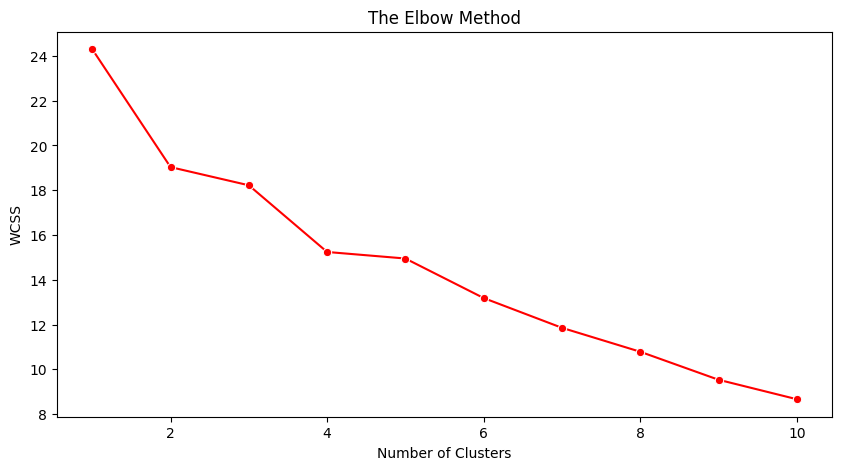

Cluster 1: WCSS = 24.29705277385384
Cluster 2: WCSS = 19.031493688175242
Cluster 3: WCSS = 18.219613689405293
Cluster 4: WCSS = 15.241185820396604
Cluster 5: WCSS = 14.948955446359244
Cluster 6: WCSS = 13.183538322500741
Cluster 7: WCSS = 11.85366953903174
Cluster 8: WCSS = 10.784732823270433
Cluster 9: WCSS = 9.533809343377934
Cluster 10: WCSS = 8.66424141301564


In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, max_iter=300)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
for i, val in enumerate(wcss, start=1):
    print(f"Cluster {i}: WCSS = {val}")

# 4. K-Means Clustering

In [12]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(features)
df['Cluster'] = cluster_labels

df.head()

,NO,NAMA,UTS,UAS,Pre-Test,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Opennsess,Total BFI,GSE,Self-Efficacy,Intrinsic Value,Test Anxiety,Cognitive Strategy,Self-Regulation,Total MSLQ,Cluster
0,1,AHM,1.00000,1.000000,0.823529,0.4,0.285714,0.523810,0.588235,0.50,135.0,1.000000,0.90,0.454545,0.800000,0.235294,0.642857,205.0,1
1,2,ABA,0.50000,0.916667,0.764706,0.4,0.214286,0.571429,0.588235,0.25,132.0,0.157895,0.30,0.181818,0.266667,0.352941,0.428571,177.0,2
2,3,AAR,0.00000,0.916667,0.470588,0.0,0.500000,0.619048,0.705882,0.25,131.0,0.605263,0.30,0.242424,0.333333,0.058824,0.142857,166.0,2
3,4,ASR,0.76875,0.500000,0.058824,0.7,0.142857,0.619048,0.764706,0.00,138.0,0.078947,0.05,0.000000,0.000000,0.000000,0.142857,146.0,2
4,5,BSR,1.00000,1.000000,0.235294,0.6,0.500000,0.333333,0.823529,0.50,142.0,0.078947,0.90,0.878788,0.866667,0.882353,0.785714,244.0,0


In [13]:
df['Cluster'].value_counts()

,count
Cluster,
2,16
1,12
0,5
3,1


## 4.1 Cluster Visualization

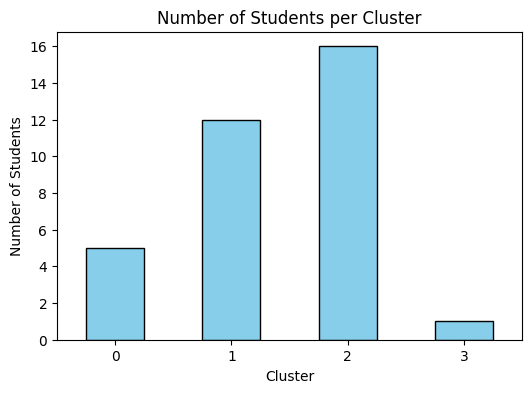

In [14]:
cluster_counts = df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(6,4))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Students per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.show()

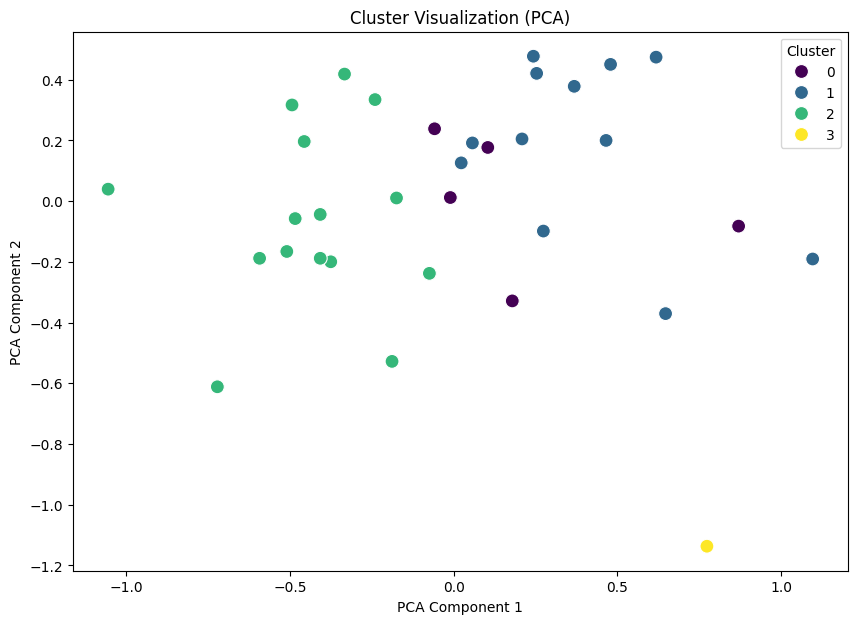

In [15]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(features)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data_2d[:, 0], y=data_2d[:, 1],
    hue=df['Cluster'], palette='viridis', s=100
)
plt.title('Cluster Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

## 4.2 Features Importance

In [16]:
from scipy.stats import f_oneway

for col in features:
    grouped_data = [df[df['Cluster'] == k][col] for k in df['Cluster'].unique()]
    f_val, p_val = f_oneway(*grouped_data)
    print(f"Fitur: {col} | F-Value: {f_val:.2f} | P-Value: {p_val:.4f}")

Fitur: UTS | F-Value: 5.35 | P-Value: 0.0045
Fitur: UAS | F-Value: 2.99 | P-Value: 0.0468
Fitur: Pre-Test | F-Value: 12.20 | P-Value: 0.0000
Fitur: Extraversion | F-Value: 2.51 | P-Value: 0.0774
Fitur: Agreeableness | F-Value: 8.73 | P-Value: 0.0003
Fitur: Conscientiousness | F-Value: 3.84 | P-Value: 0.0193
Fitur: Neuroticism | F-Value: 6.57 | P-Value: 0.0015
Fitur: Opennsess | F-Value: 7.18 | P-Value: 0.0009
Fitur: GSE | F-Value: 0.84 | P-Value: 0.4815
Fitur: Self-Efficacy | F-Value: 7.16 | P-Value: 0.0009
Fitur: Intrinsic Value | F-Value: 7.73 | P-Value: 0.0006
Fitur: Test Anxiety | F-Value: 2.76 | P-Value: 0.0593
Fitur: Cognitive Strategy | F-Value: 8.97 | P-Value: 0.0002
Fitur: Self-Regulation | F-Value: 10.38 | P-Value: 0.0001


# 5. Silhouette Evaluation

In [17]:
silhouette_scores = []
number_of_cluster = range(2,21)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
  kmeans.fit(features)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(features, labels, metric = 'euclidean'))

Text(0, 0.5, 'Silhoutte Score')

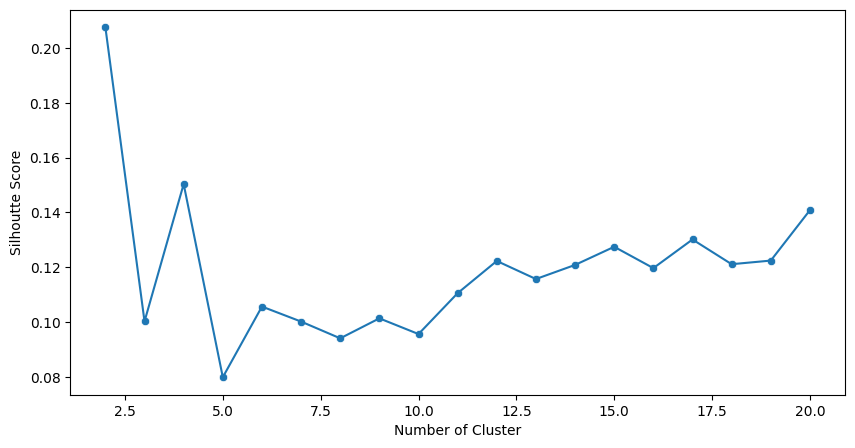

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(
    x = range(2,21),
    y = silhouette_scores
)
sns.scatterplot(
    x=range(2,21),
    y=silhouette_scores
)
plt.xticks = range(2,21)
plt.xlabel('Number of Cluster')
plt.ylabel('Silhoutte Score')

# 5. Students Grouping

In [19]:
student_id = df["NAMA"]
clusters = df["Cluster"]

In [20]:
from collections import defaultdict

groups = []
current_group = []

all_students = list(df["NAMA"].values)

for student in all_students:
    current_group.append(student)
    if len(current_group) == 5:
        groups.append(current_group)
        current_group = []

if 0 < len(current_group) < 3:
    for i, s in enumerate(current_group):
        groups[i % len(groups)].append(s)
else:
    if current_group:
        groups.append(current_group)

for i, g in enumerate(groups, 1):
    print(f"Kelompok {i}: {g}")

Kelompok 1: ['AHM', 'ABA', 'AAR', 'ASR', 'BSR']
Kelompok 2: ['CFS', 'CAL', 'CADN', 'IESP', 'IAKS']
Kelompok 3: ['KSNO', 'LSNA', 'LKAA', 'MSDA', 'MA']
Kelompok 4: ['MIUA', 'NRR', 'NG', 'OY', 'RNA']
Kelompok 5: ['RAM', 'RBA', 'RR', 'SA', 'SA']
Kelompok 6: ['SM', 'TSP', 'TSA', 'ZNAR', 'ACAP']
Kelompok 7: ['ARA', 'ADAM', 'DIAW', 'MRM']


In [21]:
df.to_csv('clustered_student_class B.csv', index=False)